# Baseline Models on MUSED-FM using run_musedfm Functions

This notebook demonstrates how to run traditional baseline forecasting models on the MUSED-FM benchmark using the functions from `run_musedfm.py`. This provides a comparison baseline for more advanced models like Chronos.

We will use the MUSED-FM framework to load the data and run multiple baseline models including Mean, Linear Trend, ARIMA, and Exponential Smoothing.


In [1]:
import os
import pandas as pd
import numpy as np
import torch
from pathlib import Path
from typing import Optional

# Enable inline plotting in Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Import MUSED-FM components
from musedfm.data import Benchmark
from musedfm.metrics import MAPE, MAE, RMSE, NMAE

# Import functions from the examples package
from examples import (
    run_models_on_benchmark, 
    compare_model_performance, 
    export_hierarchical_results_to_csv,
    export_results_to_csv
)

# Import baseline models
from musedfm.baselines import (
    MeanForecast,
    LinearTrend,
    ARIMAForecast,
    ExponentialSmoothing,
    LinearRegressionForecast,
    HistoricalInertia
)

print("MUSED-FM components imported successfully!")


MUSED-FM components imported successfully!


In [2]:
# Configuration
BENCHMARK_PATH = "/dev/shm/data/fm-eval-nested/"  # Adjust this path to your MUSED-FM data
MAX_WINDOWS = 3  # Limit windows per dataset for faster testing
OUTPUT_DIR = "./run/user/1013/musedfm_runs/baseline_models"

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Benchmark path: {BENCHMARK_PATH}")
print(f"Output directory: {OUTPUT_DIR}")


Benchmark path: /dev/shm/data/fm-eval-nested/
Output directory: ./run/user/1013/musedfm_runs/baseline_models


In [3]:
# Initialize baseline models
print("Initializing baseline models...")

# Define models dictionary (same format as run_musedfm.py)
models = {
    "mean": {"model": MeanForecast(), "univariate": True},
    "linear_trend": {"model": LinearTrend(), "univariate": True},
    "arima": {"model": ARIMAForecast(), "univariate": True},
    "exponential_smoothing": {"model": ExponentialSmoothing(), "univariate": True},
    "linear_regression": {"model": LinearRegressionForecast(), "univariate": False},
    "historical_inertia": {"model": HistoricalInertia(), "univariate": True}
}

print(f"Initialized {len(models)} baseline models:")
for model_name in models.keys():
    print(f"  - {model_name}")


Initializing baseline models...
Initialized 6 baseline models:
  - mean
  - linear_trend
  - arima
  - exponential_smoothing
  - linear_regression
  - historical_inertia


In [4]:
# Import plotting utilities
import matplotlib.pyplot as plt
from musedfm.plotting import plot_window_forecasts, plot_multiple_windows, plot_baseline_comparison

# Run baseline models evaluation with plot data collection (one window per dataset)
print("Starting baseline models evaluation with plot data collection...")

# Run evaluation using the efficient run_musedfm function with plot data collection
results = run_models_on_benchmark(
    benchmark_path=BENCHMARK_PATH,
    models=models,
    max_windows=MAX_WINDOWS,
    history_length=512,
    forecast_horizon=128,
    stride=256,
    load_cached_counts=True,
    collect_plot_data=True  # Enable plot data collection
)

print("Evaluation completed successfully!")

# Use plot data directly from results
if '_plot_data' in results:
    plot_data = results['_plot_data']
    print(f"\nUsing {len(plot_data)} windows directly from results for plotting")
    print("Plot data ready for visualization!")
else:
    print("No plot data collected during evaluation.")


Starting baseline models evaluation with plot data collection...
Running Multiple Models on Benchmark
Domain ALL_DATASETS not found in file hierarchy
successfully counted windows from cached JSON files
Domain ALL_DATASETS not found in file hierarchy
successfully counted windows from cached JSON files
Dataset aus_electricity not found in data_hierarchy.json
Loading ECL data from /dev/shm/data/fm-eval-nested/traditional/ecl
Found 1 parquet files
Successfully loaded 206 valid chunks
Dataset aus_electricity_nsw not found in file hierarchy
Dataset aus_electricity_qld not found in file hierarchy
/dev/shm/data/fm-eval-nested/traditional/open_aq [PosixPath('/dev/shm/data/fm-eval-nested/traditional/open_aq/delhi_combined.parquet'), PosixPath('/dev/shm/data/fm-eval-nested/traditional/open_aq/reykjavik_combined.parquet'), PosixPath('/dev/shm/data/fm-eval-nested/traditional/open_aq/rotterdam_combined.parquet'), PosixPath('/dev/shm/data/fm-eval-nested/traditional/open_aq/winnipeg_combined.parquet')

In [5]:
# Compare model performance
compare_model_performance(results)



Model Performance Comparison
Model                MAPE (%)   MAE        RMSE       NMAE       Time (s)  
--------------------------------------------------------------------------------
mean                 129.94     4531140.6587 6138365.7187 1.2020     26.57     
linear_trend         192.78     5701195.5899 7401826.8984 1.2893     26.58     
arima                220.47     4522114.8432 6049601.5983 1.2346     26.58     
exponential_smoothing 307.32     5267488.0452 6950419.7157 1.4341     26.58     
linear_regression    233854870.57 4755073.7120 6362491.2237 369465.3780 26.59     
linear_regression_univariate 192.88     5701195.6026 7401826.9116 1.2895     26.59     
historical_inertia   207.42     7871335.9321 9493810.5919 1.7921     26.59     

Best Performance:
  Lowest MAPE: mean (129.94%)
  Lowest MAE:  arima (4522114.8432)
  Lowest RMSE: arima (6049601.5983)
  Fastest:     mean (26.57s)



Generating Forecast Metrics CSV
Creating individual forecast plots...
['window', 'forecast', 'univariate_forecast', 'model_name', 'window_index', 'dataset_name']
Started Processing synthetic/dynamic_data_csvs - Window 0
Started Processing synthetic/synthetic_scm/large_convlag_synin_s - Window 3
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_3.png


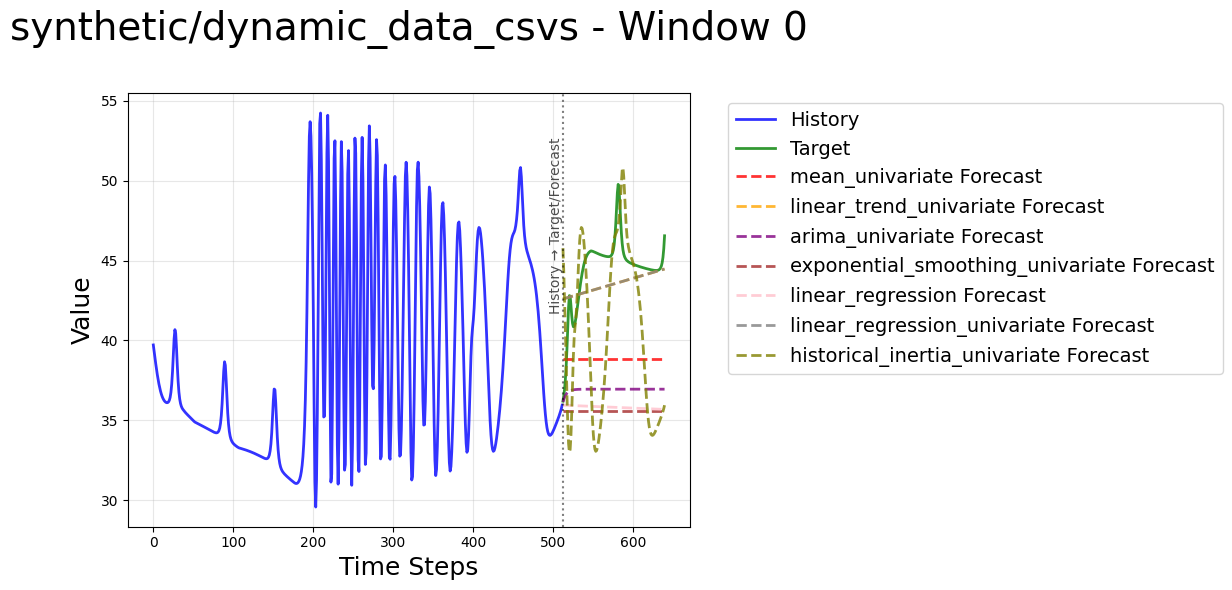

Saved plot 7: synthetic/synthetic_scm/large_convlag_synin_s - Window 3 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_7.png
Started Processing synthetic/synthetic_scm/medium_convlag_synin_s - Window 6
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_6.png


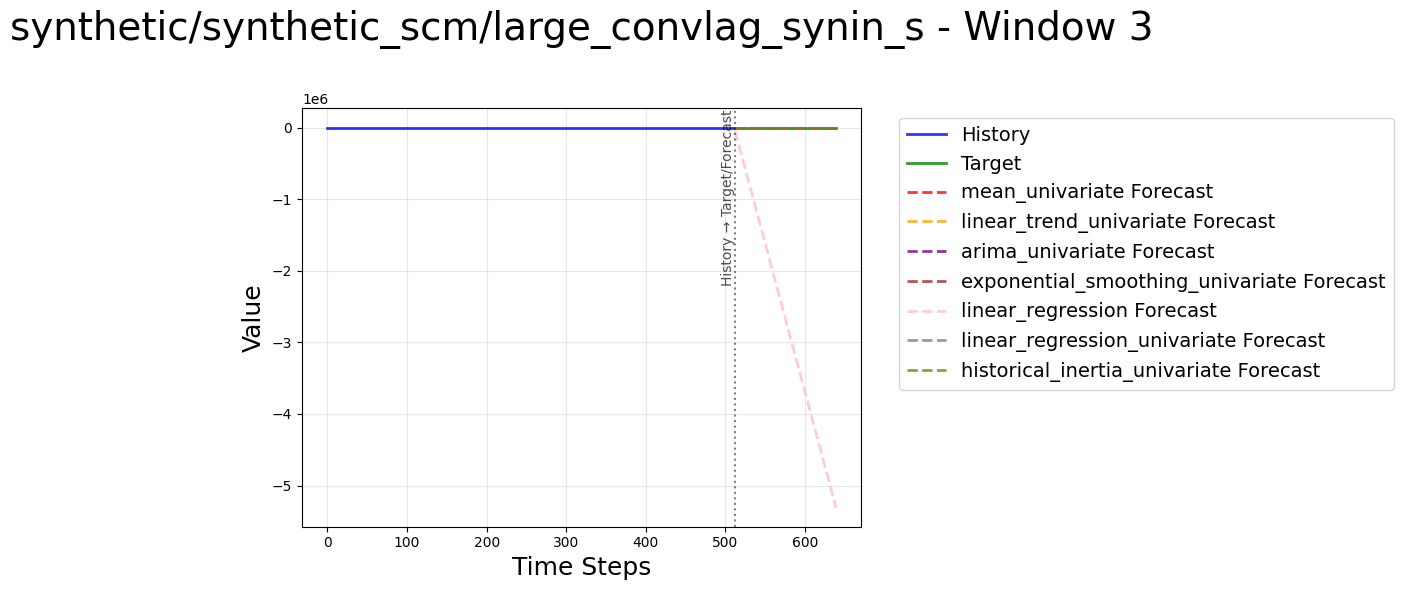

Saved plot 13: synthetic/synthetic_scm/medium_convlag_synin_s - Window 6 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_13.png
Started Processing synthetic/synthetic_scm/medium_obslag_synin_s - Window 9
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_9.png


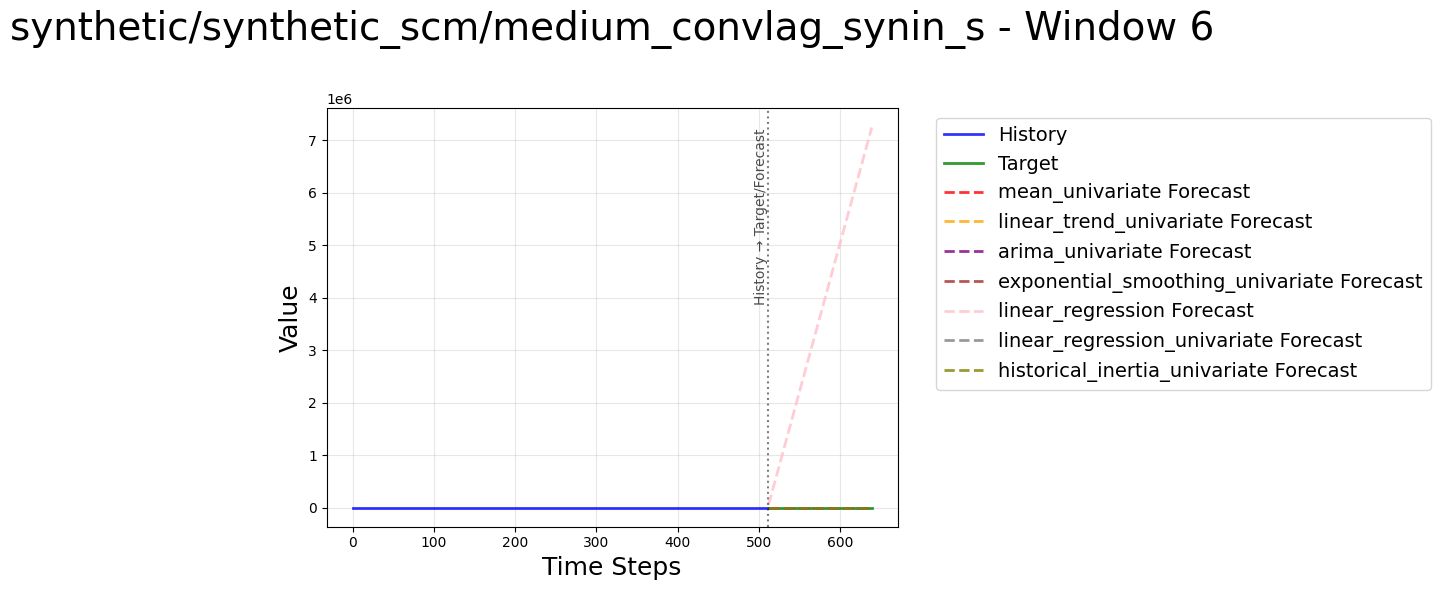

Saved plot 19: synthetic/synthetic_scm/medium_obslag_synin_s - Window 9 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_19.png
Started Processing synthetic/synthetic_scm/tiny_convlag_synin_ns - Window 12
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_12.png


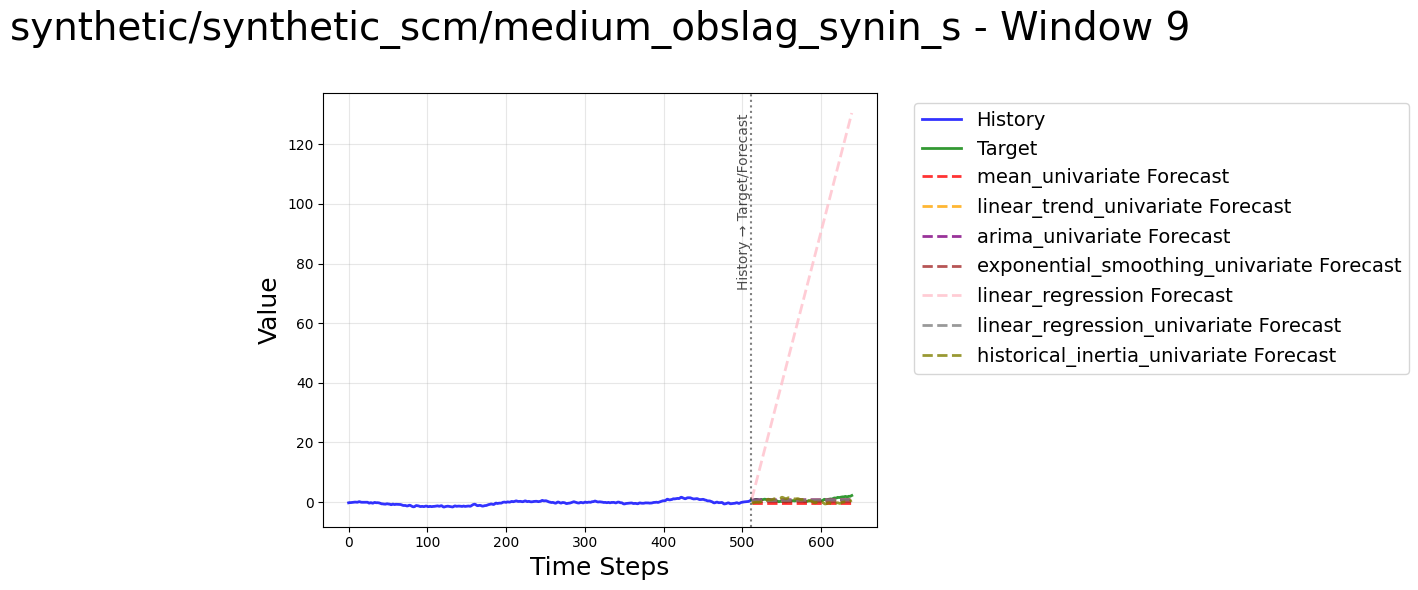

Saved plot 25: synthetic/synthetic_scm/tiny_convlag_synin_ns - Window 12 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_25.png
Started Processing synthetic/synthetic_scm/tiny_obslag_synin_ns - Window 15
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_15.png


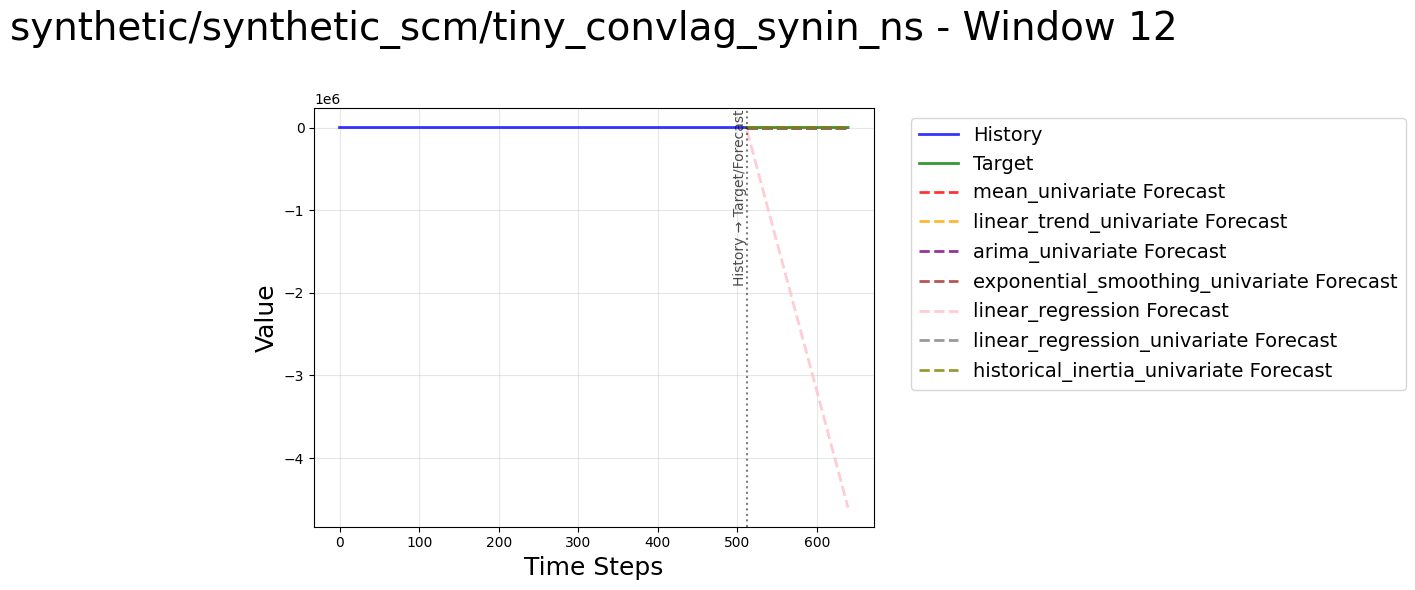

Saved plot 31: synthetic/synthetic_scm/tiny_obslag_synin_ns - Window 15 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_31.png
Started Processing collections/wikipedia - Window 18
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_18.png


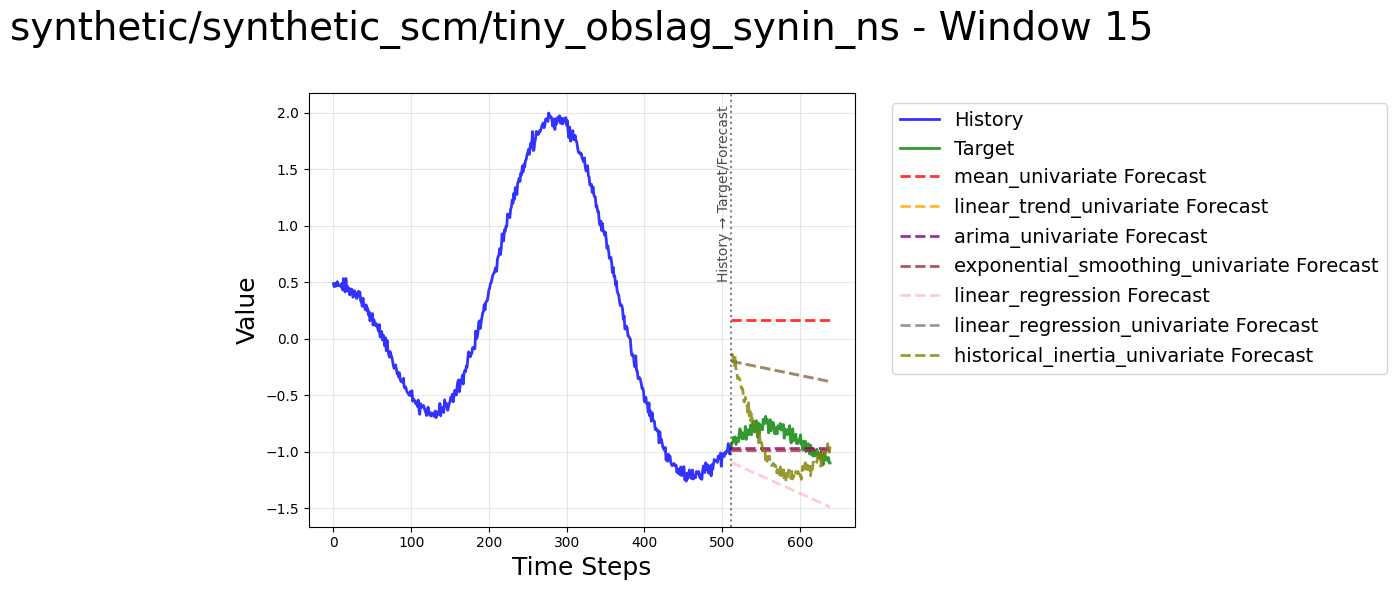

Saved plot 37: collections/wikipedia - Window 18 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_37.png
Started Processing collections/stock_nasdaqtrader - Window 21
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_21.png


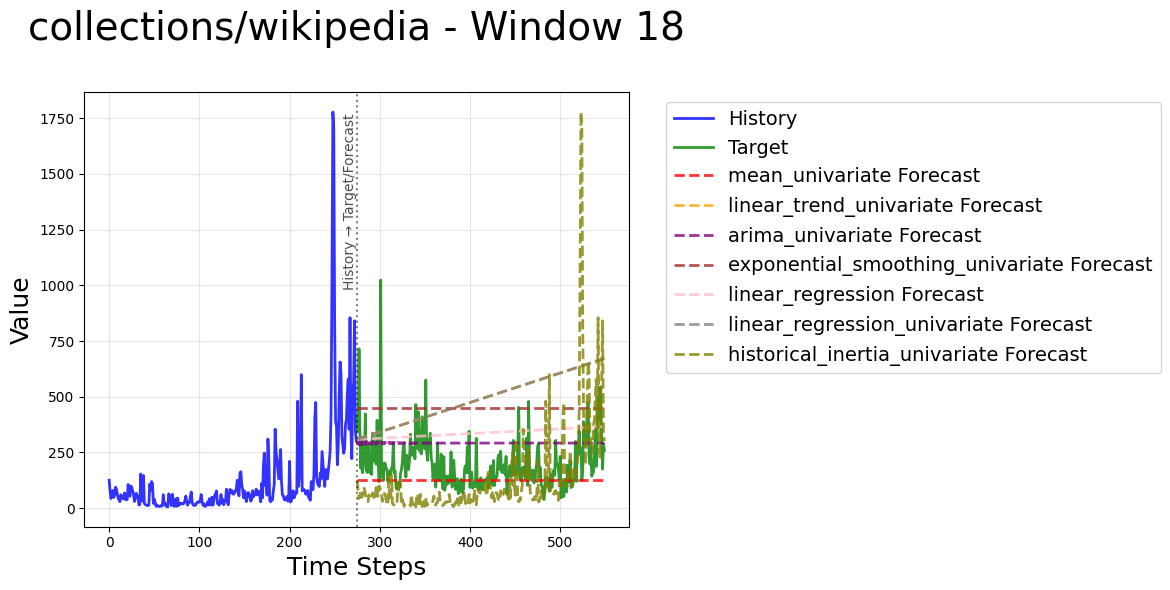

Saved plot 43: collections/stock_nasdaqtrader - Window 21 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_43.png
Started Processing traditional/fl_electricity - Window 24
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_24.png


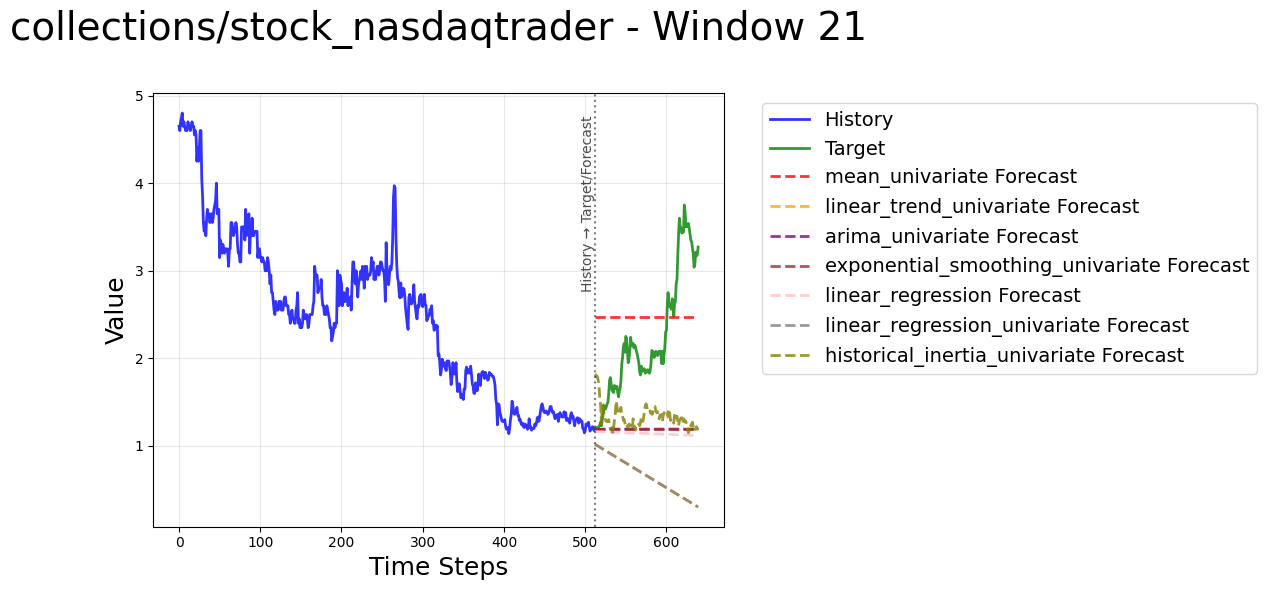

Saved plot 49: traditional/fl_electricity - Window 24 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_49.png
Started Processing traditional/hourly_electricity/az_electricity - Window 27
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_27.png


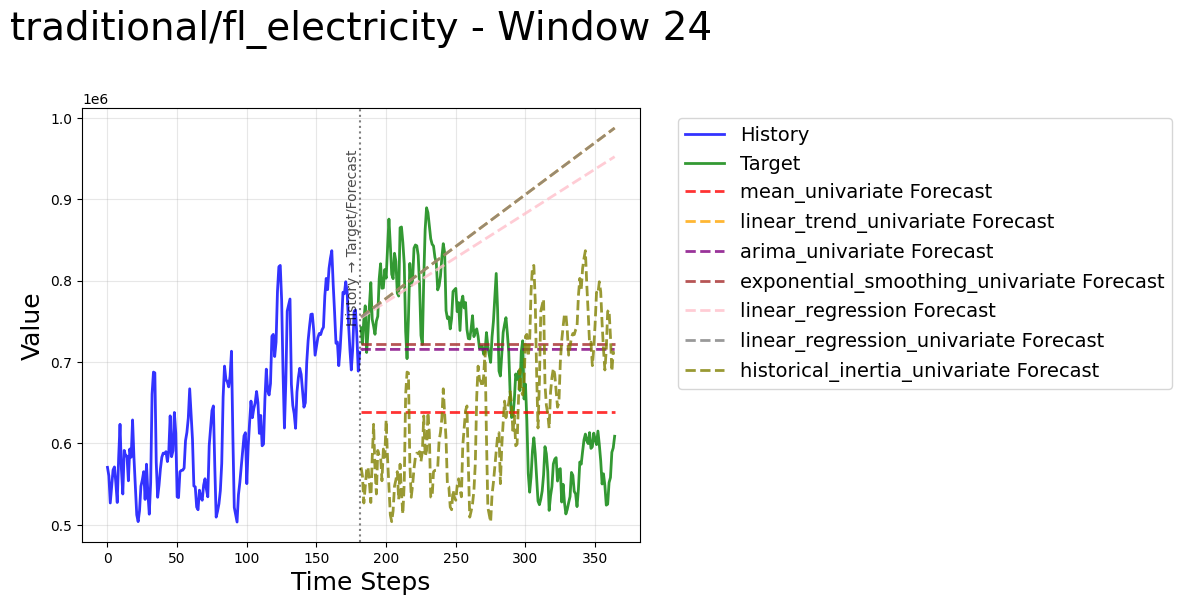

Saved plot 55: traditional/hourly_electricity/az_electricity - Window 27 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_55.png
Started Processing traditional/hourly_electricity/id_electricity - Window 30
Plot saved to: run/user/1013/musedfm_runs/baseline_models/plots/baseline_forecast_30.png


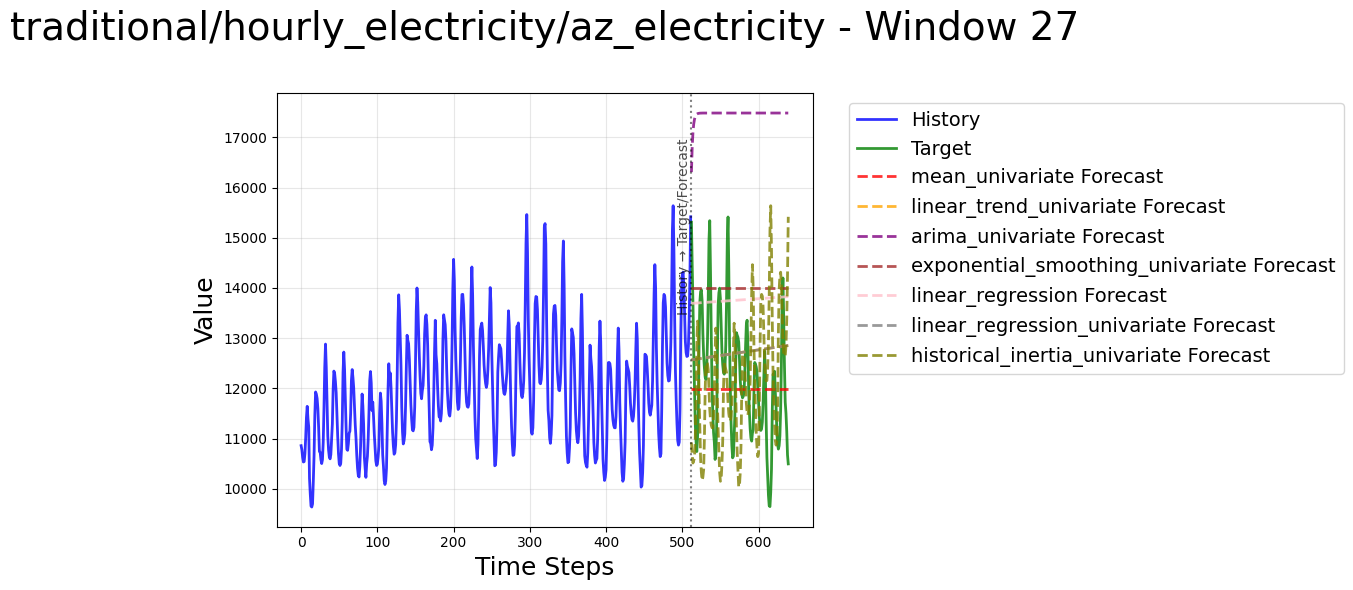

Saved plot 61: traditional/hourly_electricity/id_electricity - Window 30 to ./run/user/1013/musedfm_runs/baseline_models/plots/forecast_plot_61.png


True

In [7]:
import copy
from examples.run_musedfm import generate_forecast_plots

generate_forecast_plots(results, OUTPUT_DIR, limit_windows=10)

In [ ]:
# Export hierarchical results to CSV
export_hierarchical_results_to_csv(results, output_dir=OUTPUT_DIR)


Exporting Hierarchical Results to CSV
✓ Cleaned directory: ./results/baseline_models/categories
✓ Cleaned directory: ./results/baseline_models/domains
✓ Cleaned directory: ./results/baseline_models/datasets
✓ Category results saved: mean_category_results.csv
✓ Category results saved: linear_trend_category_results.csv
✓ Category results saved: arima_category_results.csv
✓ Category results saved: exponential_smoothing_category_results.csv
✓ Category results saved: linear_regression_category_results.csv
✓ Category results saved: linear_regression_univariate_category_results.csv
✓ Category results saved: historical_inertia_category_results.csv
✓ Dataset results saved: mean_dataset_results.csv
✓ Dataset results saved: linear_trend_dataset_results.csv
✓ Dataset results saved: arima_dataset_results.csv
✓ Dataset results saved: exponential_smoothing_dataset_results.csv
✓ Dataset results saved: linear_regression_dataset_results.csv
✓ Dataset results saved: linear_regression_univariate_dataset_

In [8]:
# Display results summary
print("\nBaseline Models Results Summary:")
print("=" * 50)

for model_name in models.keys():
    if model_name in results:
        model_results = results[model_name]
        print(f"\n{model_name.upper()}:")
        print(f"  Total windows processed: {model_results['windows']}")
        print(f"  Total time: {model_results['time']:.2f} seconds")
        
        if model_results['metrics']:
            metrics = model_results['metrics']
            print(f"  Average MAPE: {metrics.get('MAPE', 'N/A'):.2f}%")
            print(f"  Average MAE: {metrics.get('MAE', 'N/A'):.4f}")
            print(f"  Average RMSE: {metrics.get('RMSE', 'N/A'):.4f}")
            print(f"  Average NMAE: {metrics.get('NMAE', 'N/A'):.4f}")

print(f"\nResults saved to: {OUTPUT_DIR}")



Baseline Models Results Summary:

MEAN:
  Total windows processed: 242
  Total time: 26.57 seconds
  Average MAPE: 129.94%
  Average MAE: 4531140.6587
  Average RMSE: 6138365.7187
  Average NMAE: 1.2020

LINEAR_TREND:
  Total windows processed: 242
  Total time: 26.58 seconds
  Average MAPE: 192.78%
  Average MAE: 5701195.5899
  Average RMSE: 7401826.8984
  Average NMAE: 1.2893

ARIMA:
  Total windows processed: 242
  Total time: 26.58 seconds
  Average MAPE: 220.47%
  Average MAE: 4522114.8432
  Average RMSE: 6049601.5983
  Average NMAE: 1.2346

EXPONENTIAL_SMOOTHING:
  Total windows processed: 242
  Total time: 26.58 seconds
  Average MAPE: 307.32%
  Average MAE: 5267488.0452
  Average RMSE: 6950419.7157
  Average NMAE: 1.4341

LINEAR_REGRESSION:
  Total windows processed: 242
  Total time: 26.59 seconds
  Average MAPE: 233854870.57%
  Average MAE: 4755073.7120
  Average RMSE: 6362491.2237
  Average NMAE: 369465.3780

HISTORICAL_INERTIA:
  Total windows processed: 242
  Total time: 

## Summary

This notebook demonstrates how to run traditional baseline forecasting models on the MUSED-FM benchmark using the efficient functions from `run_musedfm.py`. 

### Key Benefits:

1. **Comprehensive Baseline**: Tests multiple traditional forecasting methods
2. **Efficient**: Uses optimized evaluation functions instead of custom loops
3. **Comparative**: Allows direct comparison between different baseline models
4. **Visual**: Generates plots showing how each model performs
5. **Minimal code**: Only ~10 cells vs. hundreds of lines in custom evaluation

### Models Tested:

- **Mean Forecast**: Simple average of historical values
- **Linear Trend**: Linear regression on time
- **ARIMA**: AutoRegressive Integrated Moving Average
- **Exponential Smoothing**: Weighted average with exponential decay

### Functions Used:

- `run_models_on_benchmark()`: Main evaluation function
- `compare_model_performance()`: Performance comparison
- `export_hierarchical_results_to_csv()`: Hierarchical CSV export
- `plot_window_forecasts()`: Individual forecast visualization
- `plot_multiple_windows()`: Multi-window comparison
- `plot_baseline_comparison()`: Model comparison with metrics

This approach provides a solid baseline for comparing more advanced models like Chronos Bolt, and leverages the existing, well-tested evaluation framework while keeping the notebook clean and efficient.
